# ANÁLISIS EXPLORATORIO

Realizamos EDA con el Dataset_2, con el filtrado ya realizado.

Importación de librerías y datos.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.dates import DateFormatter

In [2]:
df = pd.read_csv('../Datasets/Dataset_2.csv',index_col='fecha')
df = df.sort_index()
df.index = pd.to_datetime(df.index)
df = df.drop(['CurvaCola','Negro','Congelado', 'Hum'],axis=1)

## Análisis multivariable

Leemos las variables de las que disponemos e imprimos el principio y final del dataset.

In [3]:
columnas_iniciales = df.columns.values
columnas_iniciales

array(['FormacionNIRHumedadPV', 'FibraticPredNIRHumedadPV', 'Hum_Pred',
       'Etapa2MWHumedadPV', 'ExtractorVelocidadPV',
       'FormacionAlturaMantaPV', 'FormadoraVelocidadPV',
       'FormadoraSiloNivel', 'SiloFibraNivel', 'SiloFibraVelocidadPV',
       'SiloRechazosNivelPV', 'SiloRechazosVelocidadPV', 'SierrasAnchoPV',
       'ScalperPosPV', 'ScalperReservaMediaPV', 'ScalperReservaDerPosPV',
       'ScalperReservaIzqPosPV', 'FormacionNIRPH',
       'FormacionNIRHumedadPV_std', 'FibraticPredNIRHumedadPV_std',
       'Hum_Pred_std', 'Etapa2MWHumedadPV_std'], dtype=object)

In [4]:
df.head(2)

,FormacionNIRHumedadPV,FibraticPredNIRHumedadPV,Hum_Pred,Etapa2MWHumedadPV,ExtractorVelocidadPV,FormacionAlturaMantaPV,FormadoraVelocidadPV,FormadoraSiloNivel,SiloFibraNivel,SiloFibraVelocidadPV,...,SierrasAnchoPV,ScalperPosPV,ScalperReservaMediaPV,ScalperReservaDerPosPV,ScalperReservaIzqPosPV,FormacionNIRPH,FormacionNIRHumedadPV_std,FibraticPredNIRHumedadPV_std,Hum_Pred_std,Etapa2MWHumedadPV_std
fecha,,,,,,,,,,,,,,,,,,,,,
2021-02-10 10:00:00,0.0,6.465569,10.920920,13.141570,50.55861,120.965,37.6,70.741330,12.590190,26.1,...,2142.64,260.2400,66.029085,66.029085,66.029085,0.0,0.0,0.022282,0.163959,0.221663
2021-02-10 10:01:00,0.0,6.355772,10.604865,12.412745,50.55929,112.285,29.6,72.317965,9.990133,21.4,...,2142.63,258.5775,68.508440,68.508440,68.508440,0.0,0.0,0.029155,0.060918,0.151328


In [5]:
df.tail(2)

,FormacionNIRHumedadPV,FibraticPredNIRHumedadPV,Hum_Pred,Etapa2MWHumedadPV,ExtractorVelocidadPV,FormacionAlturaMantaPV,FormadoraVelocidadPV,FormadoraSiloNivel,SiloFibraNivel,SiloFibraVelocidadPV,...,SierrasAnchoPV,ScalperPosPV,ScalperReservaMediaPV,ScalperReservaDerPosPV,ScalperReservaIzqPosPV,FormacionNIRPH,FormacionNIRHumedadPV_std,FibraticPredNIRHumedadPV_std,Hum_Pred_std,Etapa2MWHumedadPV_std
fecha,,,,,,,,,,,,,,,,,,,,,
2021-12-24 01:11:00,8.034976,8.220307,10.015770,13.541960,70.15891,84.87000,63.9,84.99973,29.60058,35.0,...,2491.430,328.89000,52.57121,52.57121,52.57121,5.549932,0.025811,0.021008,0.117752,0.221532
2021-12-24 01:12:00,7.935497,8.278955,9.998903,13.179215,70.28824,84.86499,64.1,84.99973,19.99036,35.0,...,2491.435,328.72245,51.44651,51.44651,51.44651,5.548452,0.032466,0.011369,0.037083,0.064146


Comprobamos los valores nulos que hai en cada fila.

In [6]:
df.isnull().sum()

FormacionNIRHumedadPV           0
FibraticPredNIRHumedadPV        0
Hum_Pred                        0
Etapa2MWHumedadPV               0
ExtractorVelocidadPV            0
FormacionAlturaMantaPV          0
FormadoraVelocidadPV            0
FormadoraSiloNivel              0
SiloFibraNivel                  0
SiloFibraVelocidadPV            0
SiloRechazosNivelPV             0
SiloRechazosVelocidadPV         0
SierrasAnchoPV                  0
ScalperPosPV                    0
ScalperReservaMediaPV           0
ScalperReservaDerPosPV          0
ScalperReservaIzqPosPV          0
FormacionNIRPH                  0
FormacionNIRHumedadPV_std       0
FibraticPredNIRHumedadPV_std    0
Hum_Pred_std                    0
Etapa2MWHumedadPV_std           0
dtype: int64

Comprobamos cuántos valores hai menores que cero por columna.

In [7]:
df[df<0].count()

FormacionNIRHumedadPV           4
FibraticPredNIRHumedadPV        0
Hum_Pred                        0
Etapa2MWHumedadPV               0
ExtractorVelocidadPV            0
FormacionAlturaMantaPV          0
FormadoraVelocidadPV            0
FormadoraSiloNivel              0
SiloFibraNivel                  0
SiloFibraVelocidadPV            0
SiloRechazosNivelPV             0
SiloRechazosVelocidadPV         0
SierrasAnchoPV                  0
ScalperPosPV                    0
ScalperReservaMediaPV           0
ScalperReservaDerPosPV          0
ScalperReservaIzqPosPV          0
FormacionNIRPH                  0
FormacionNIRHumedadPV_std       0
FibraticPredNIRHumedadPV_std    0
Hum_Pred_std                    0
Etapa2MWHumedadPV_std           0
dtype: int64

Principales medidas estadísticas.

In [8]:
df.describe()

,FormacionNIRHumedadPV,FibraticPredNIRHumedadPV,Hum_Pred,Etapa2MWHumedadPV,ExtractorVelocidadPV,FormacionAlturaMantaPV,FormadoraVelocidadPV,FormadoraSiloNivel,SiloFibraNivel,SiloFibraVelocidadPV,...,SierrasAnchoPV,ScalperPosPV,ScalperReservaMediaPV,ScalperReservaDerPosPV,ScalperReservaIzqPosPV,FormacionNIRPH,FormacionNIRHumedadPV_std,FibraticPredNIRHumedadPV_std,Hum_Pred_std,Etapa2MWHumedadPV_std
count,279048.000000,279048.000000,279048.000000,279048.000000,279048.000000,279048.000000,279048.000000,279048.000000,279048.000000,279048.000000,...,279048.000000,279048.000000,279048.000000,279048.000000,279048.000000,279048.000000,279048.000000,279048.000000,279048.000000,279048.000000
mean,8.301280,7.795188,10.534156,12.800655,65.692398,171.858366,51.504002,79.146764,44.364914,25.942395,...,2265.845896,394.094805,66.251727,66.251725,66.251725,5.071681,0.035829,0.021851,0.100786,0.240839
std,2.287132,1.854448,1.272975,1.423794,11.696302,122.389104,9.888979,8.841971,18.492007,6.378914,...,196.523440,116.612595,6.742898,6.742897,6.742898,1.399069,0.035996,0.022435,0.064436,0.178683
min,-5.520000,0.000000,4.106783,4.307451,23.837570,61.109990,0.000000,16.990600,9.990133,0.000000,...,1873.830000,187.575000,47.659380,47.659380,47.659380,0.000000,0.000000,0.000000,0.026158,0.027268
25%,8.158966,7.100652,9.739249,12.104710,58.400768,102.075000,44.950000,79.998110,19.990360,21.600000,...,2141.400000,300.781837,61.331550,61.331550,61.331550,5.190000,0.012463,0.007708,0.059222,0.119333
50%,8.720000,8.087235,10.646610,12.956860,68.319310,126.995000,52.600000,79.998860,49.997620,25.900000,...,2145.270000,394.159900,66.609200,66.609200,66.609200,5.490000,0.024925,0.015468,0.082858,0.190980
75%,9.310000,8.833664,11.461325,13.728482,74.749448,186.635000,58.500000,84.997000,59.995940,30.750000,...,2491.220000,464.610000,71.298137,71.298137,71.298137,5.610000,0.046709,0.028479,0.121111,0.305435
max,16.750000,11.355420,13.048800,15.883530,84.257140,625.625000,70.000000,89.889380,93.541570,35.000000,...,2547.410000,739.520000,81.354805,81.354805,81.354805,6.000000,0.267300,0.173216,0.690625,1.405352


Matriz de correlación y mapa de calor de la tabla.

In [9]:
df.corr()

,FormacionNIRHumedadPV,FibraticPredNIRHumedadPV,Hum_Pred,Etapa2MWHumedadPV,ExtractorVelocidadPV,FormacionAlturaMantaPV,FormadoraVelocidadPV,FormadoraSiloNivel,SiloFibraNivel,SiloFibraVelocidadPV,...,SierrasAnchoPV,ScalperPosPV,ScalperReservaMediaPV,ScalperReservaDerPosPV,ScalperReservaIzqPosPV,FormacionNIRPH,FormacionNIRHumedadPV_std,FibraticPredNIRHumedadPV_std,Hum_Pred_std,Etapa2MWHumedadPV_std
FormacionNIRHumedadPV,1.000000,0.140586,-0.016825,0.185439,0.399005,-0.109245,0.398401,0.007513,0.080143,0.280541,...,0.039218,-0.009752,-0.148931,-0.148932,-0.148932,0.801558,0.270882,0.010752,-0.044400,-0.066299
FibraticPredNIRHumedadPV,0.140586,1.000000,0.450429,0.257113,0.427664,-0.074711,0.310007,0.012274,0.045576,0.234571,...,0.109132,-0.119589,-0.159893,-0.159893,-0.159893,0.012355,0.046444,0.139003,-0.171761,-0.113537
Hum_Pred,-0.016825,0.450429,1.000000,0.476709,0.340303,-0.035574,0.256174,0.033137,0.060553,0.122394,...,-0.013428,-0.140309,-0.154427,-0.154427,-0.154427,-0.191404,-0.033028,0.036080,-0.109603,-0.136911
Etapa2MWHumedadPV,0.185439,0.257113,0.476709,1.000000,0.348337,-0.127770,0.313883,0.020967,0.076107,0.165492,...,-0.001836,-0.080886,-0.123110,-0.123110,-0.123110,0.042566,0.028655,0.010924,-0.105962,-0.070894
ExtractorVelocidadPV,0.399005,0.427664,0.340303,0.348337,1.000000,-0.166439,0.720773,0.023645,0.129450,0.546941,...,0.331084,-0.256250,-0.364155,-0.364155,-0.364155,0.264236,0.147293,0.008519,-0.083310,-0.195915
FormacionAlturaMantaPV,-0.109245,-0.074711,-0.035574,-0.127770,-0.166439,1.000000,-0.156543,0.001710,-0.000825,-0.109439,...,-0.035058,0.211321,0.146662,0.146661,0.146661,-0.070525,0.007051,0.021256,0.011612,0.038563
FormadoraVelocidadPV,0.398401,0.310007,0.256174,0.313883,0.720773,-0.156543,1.000000,-0.065663,0.192887,0.517170,...,-0.017944,-0.293657,-0.308840,-0.308840,-0.308840,0.331266,0.119565,0.021093,-0.066445,-0.149921
FormadoraSiloNivel,0.007513,0.012274,0.033137,0.020967,0.023645,0.001710,-0.065663,1.000000,0.248600,-0.306559,...,-0.149536,0.080294,0.067775,0.067774,0.067774,0.019969,-0.107935,-0.063202,-0.025445,-0.039051
SiloFibraNivel,0.080143,0.045576,0.060553,0.076107,0.129450,-0.000825,0.192887,0.248600,1.000000,-0.424302,...,-0.058987,0.125805,-0.066506,-0.066507,-0.066507,0.122649,-0.080857,0.018988,-0.005667,-0.043092
SiloFibraVelocidadPV,0.280541,0.234571,0.122394,0.165492,0.546941,-0.109439,0.517170,-0.306559,-0.424302,1.000000,...,0.300372,-0.196697,-0.221573,-0.221574,-0.221574,0.208381,0.184675,0.015898,-0.051287,-0.086766


<AxesSubplot:>

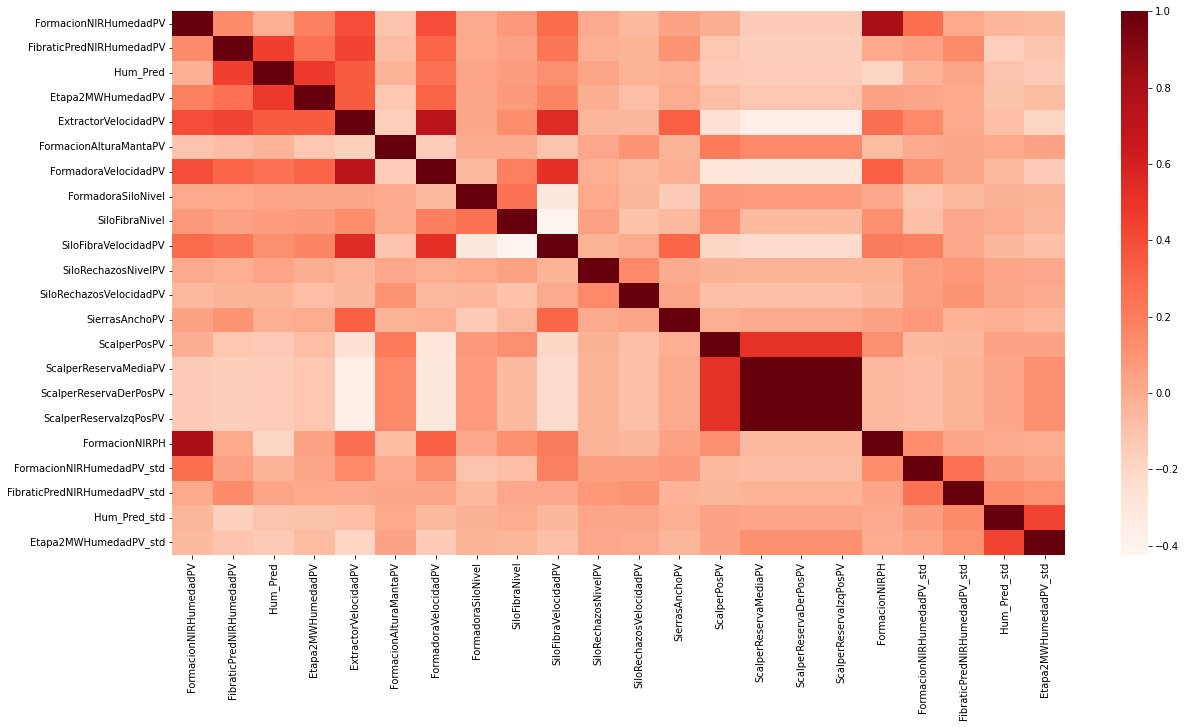

In [10]:
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), cmap = 'Reds',ax=ax)

Principales gráficos.

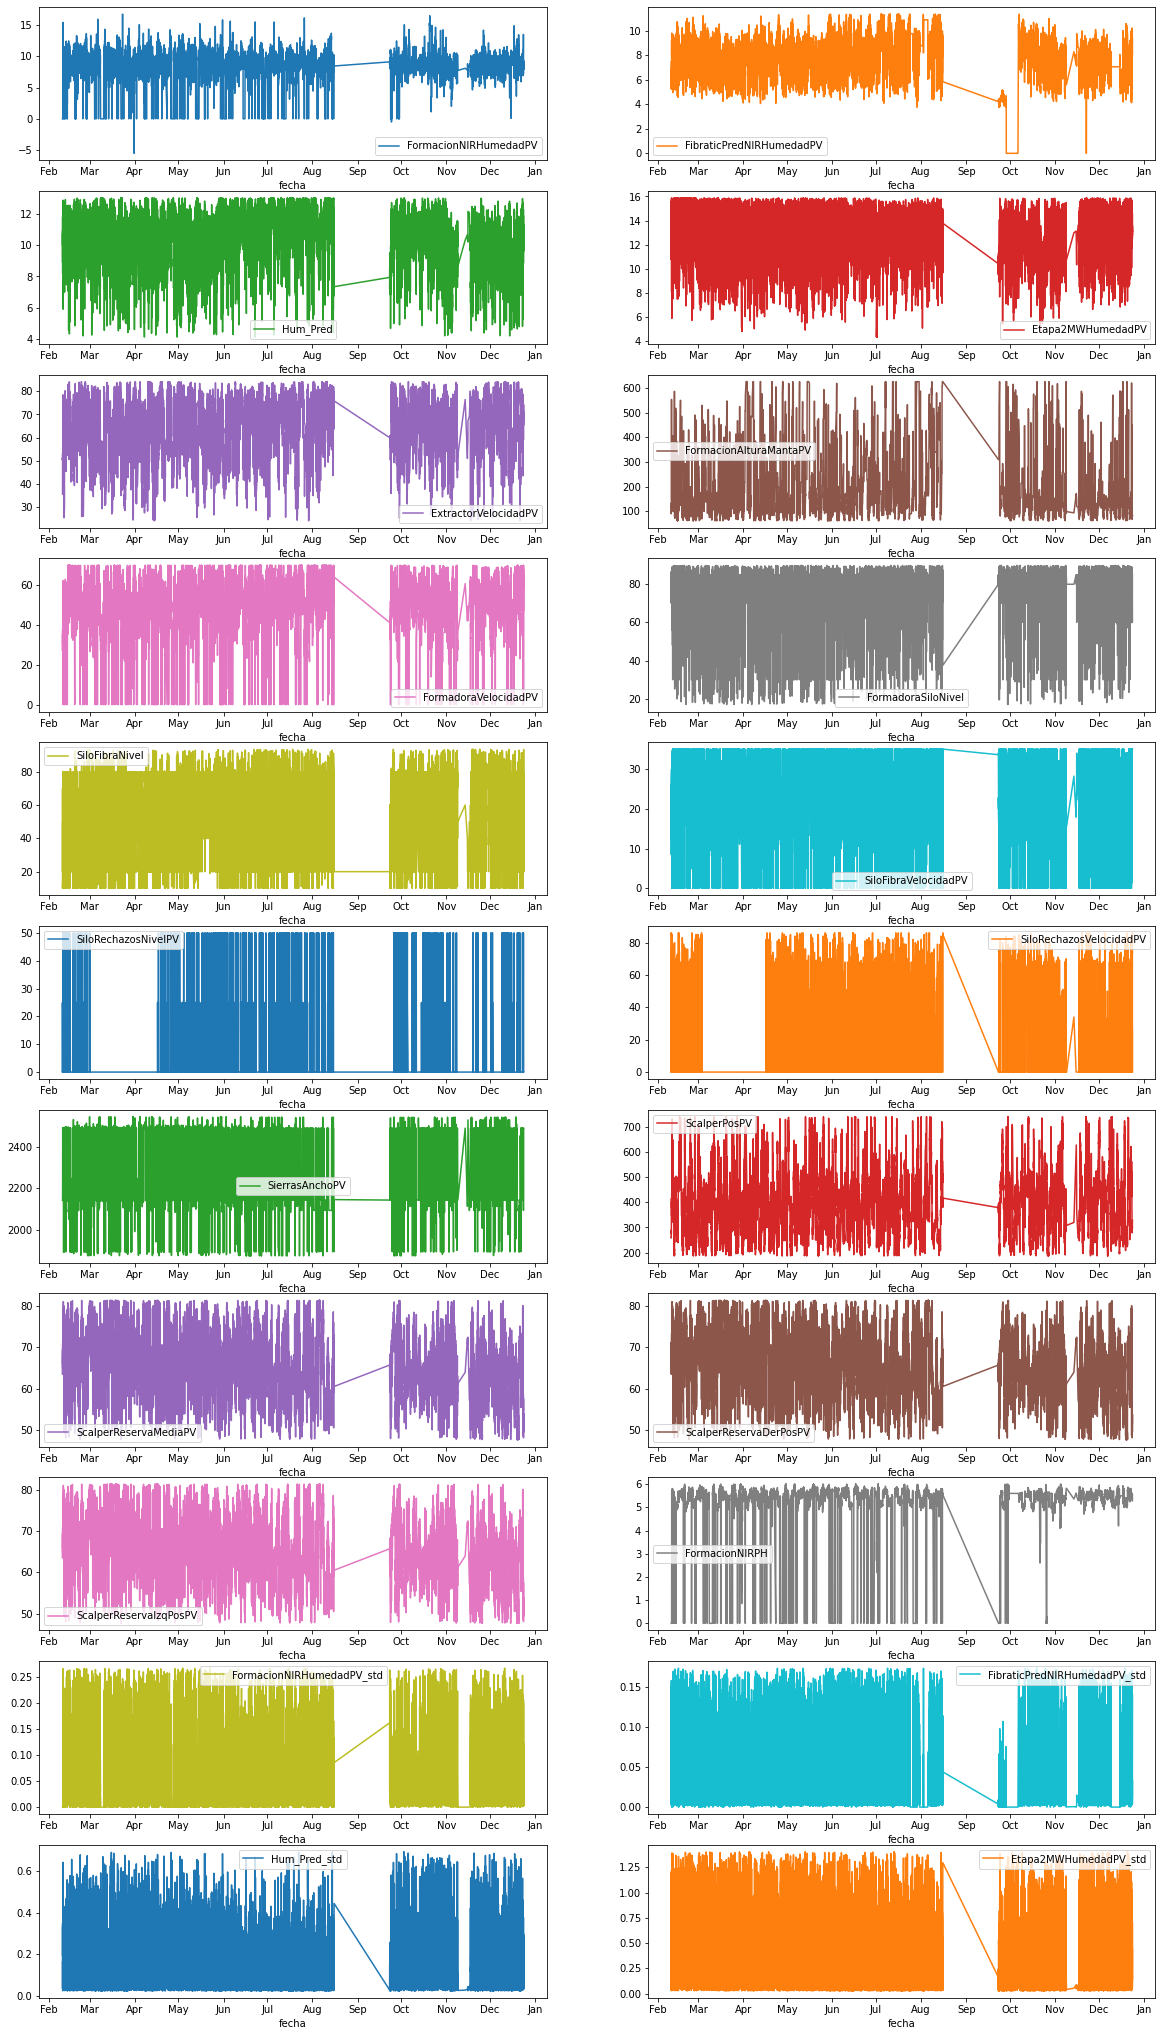

In [11]:
date_form = DateFormatter("%b")

ax = df.plot(layout=(12,2),figsize=(20,40),subplots=True,sharex=False)

for i in range(12):
    for j in range(2):
        ax[i,j].xaxis.set_major_formatter(date_form)

plt.show()

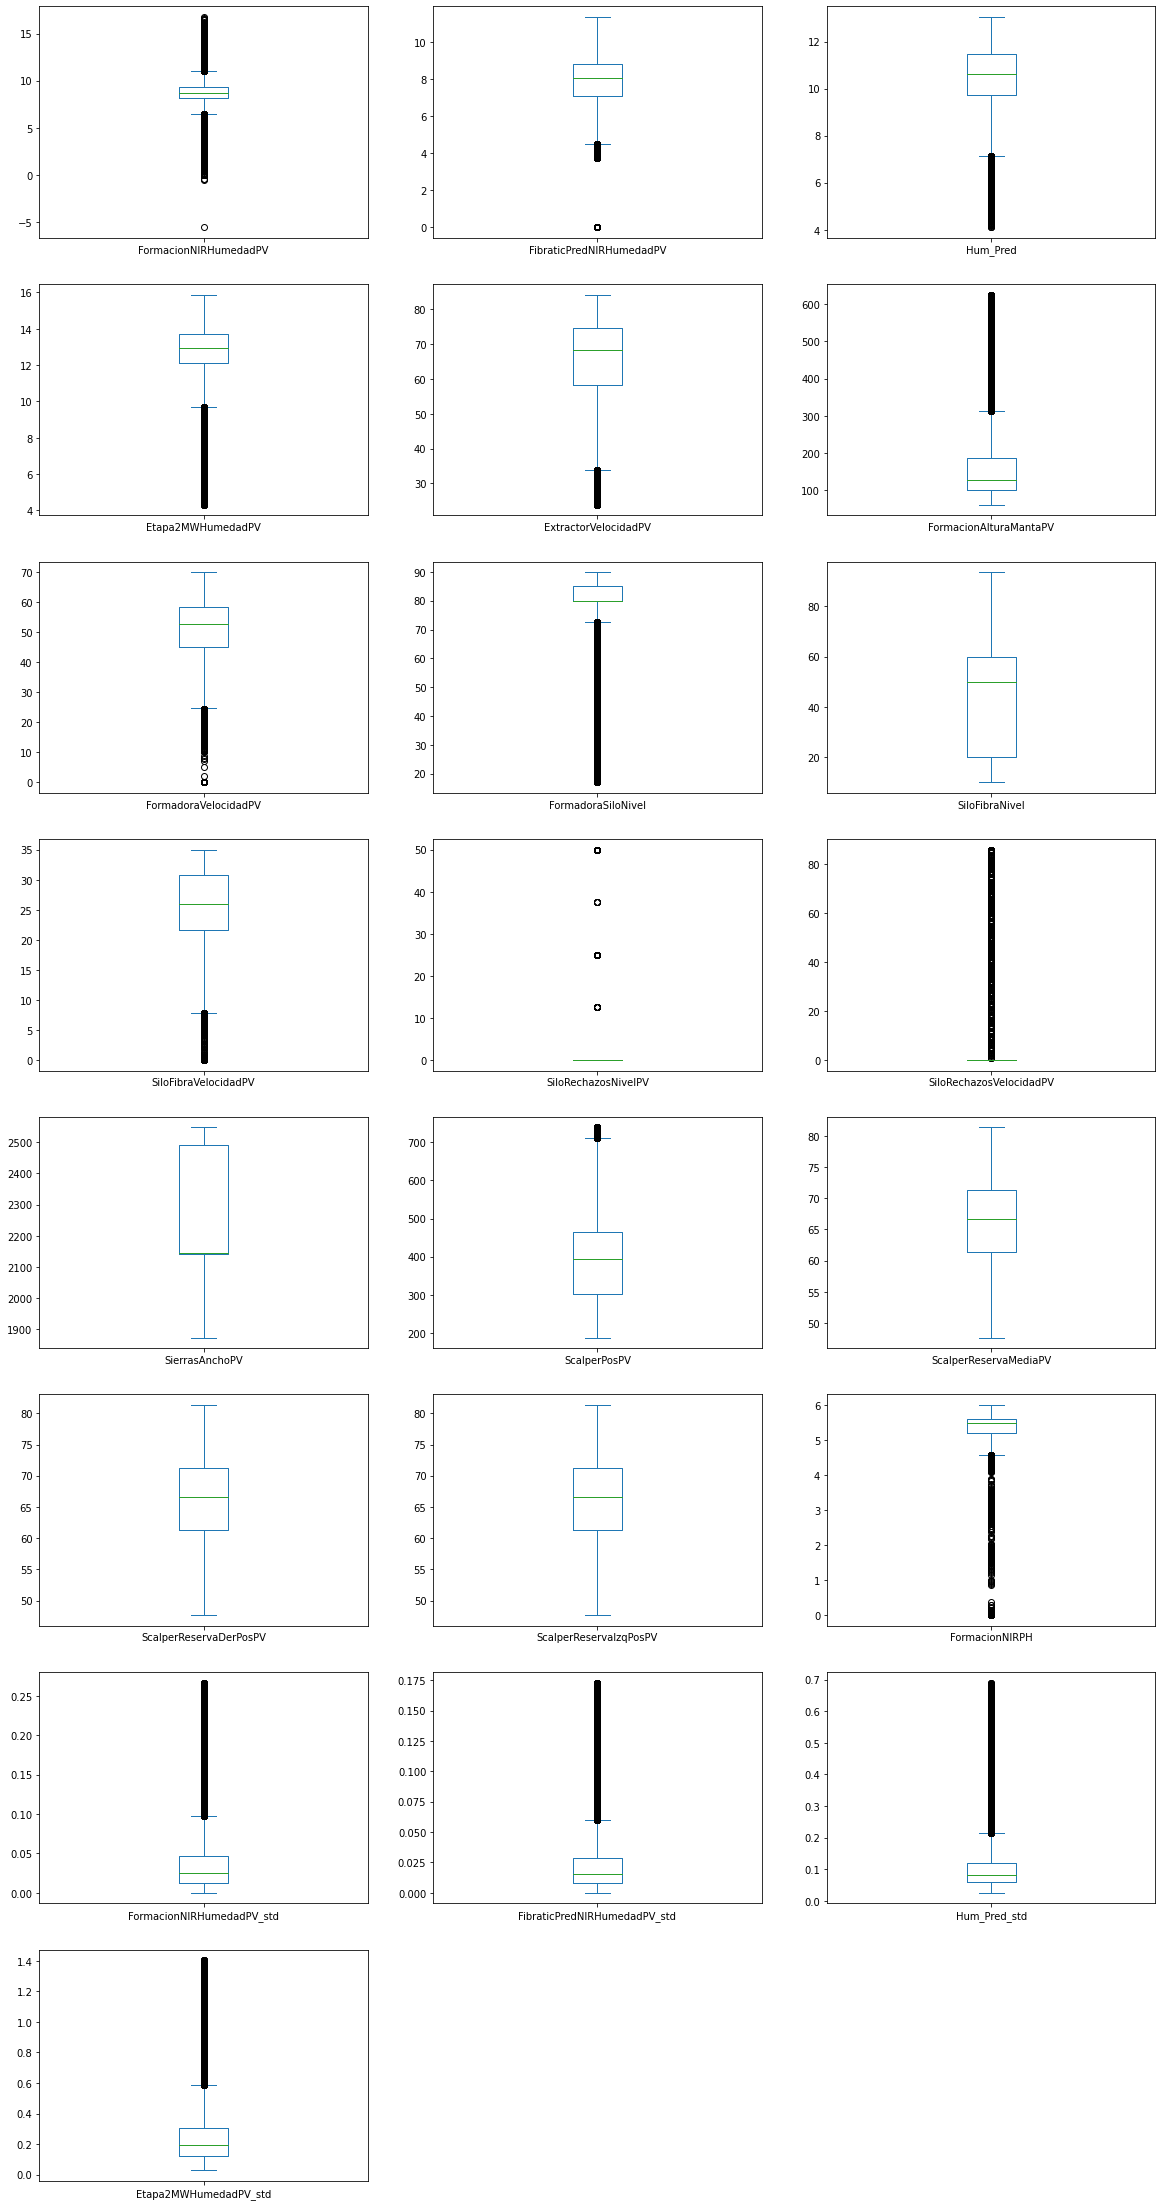

In [12]:
df.plot.box(subplots=True,layout=(8,3),figsize=(20,40))
plt.show()

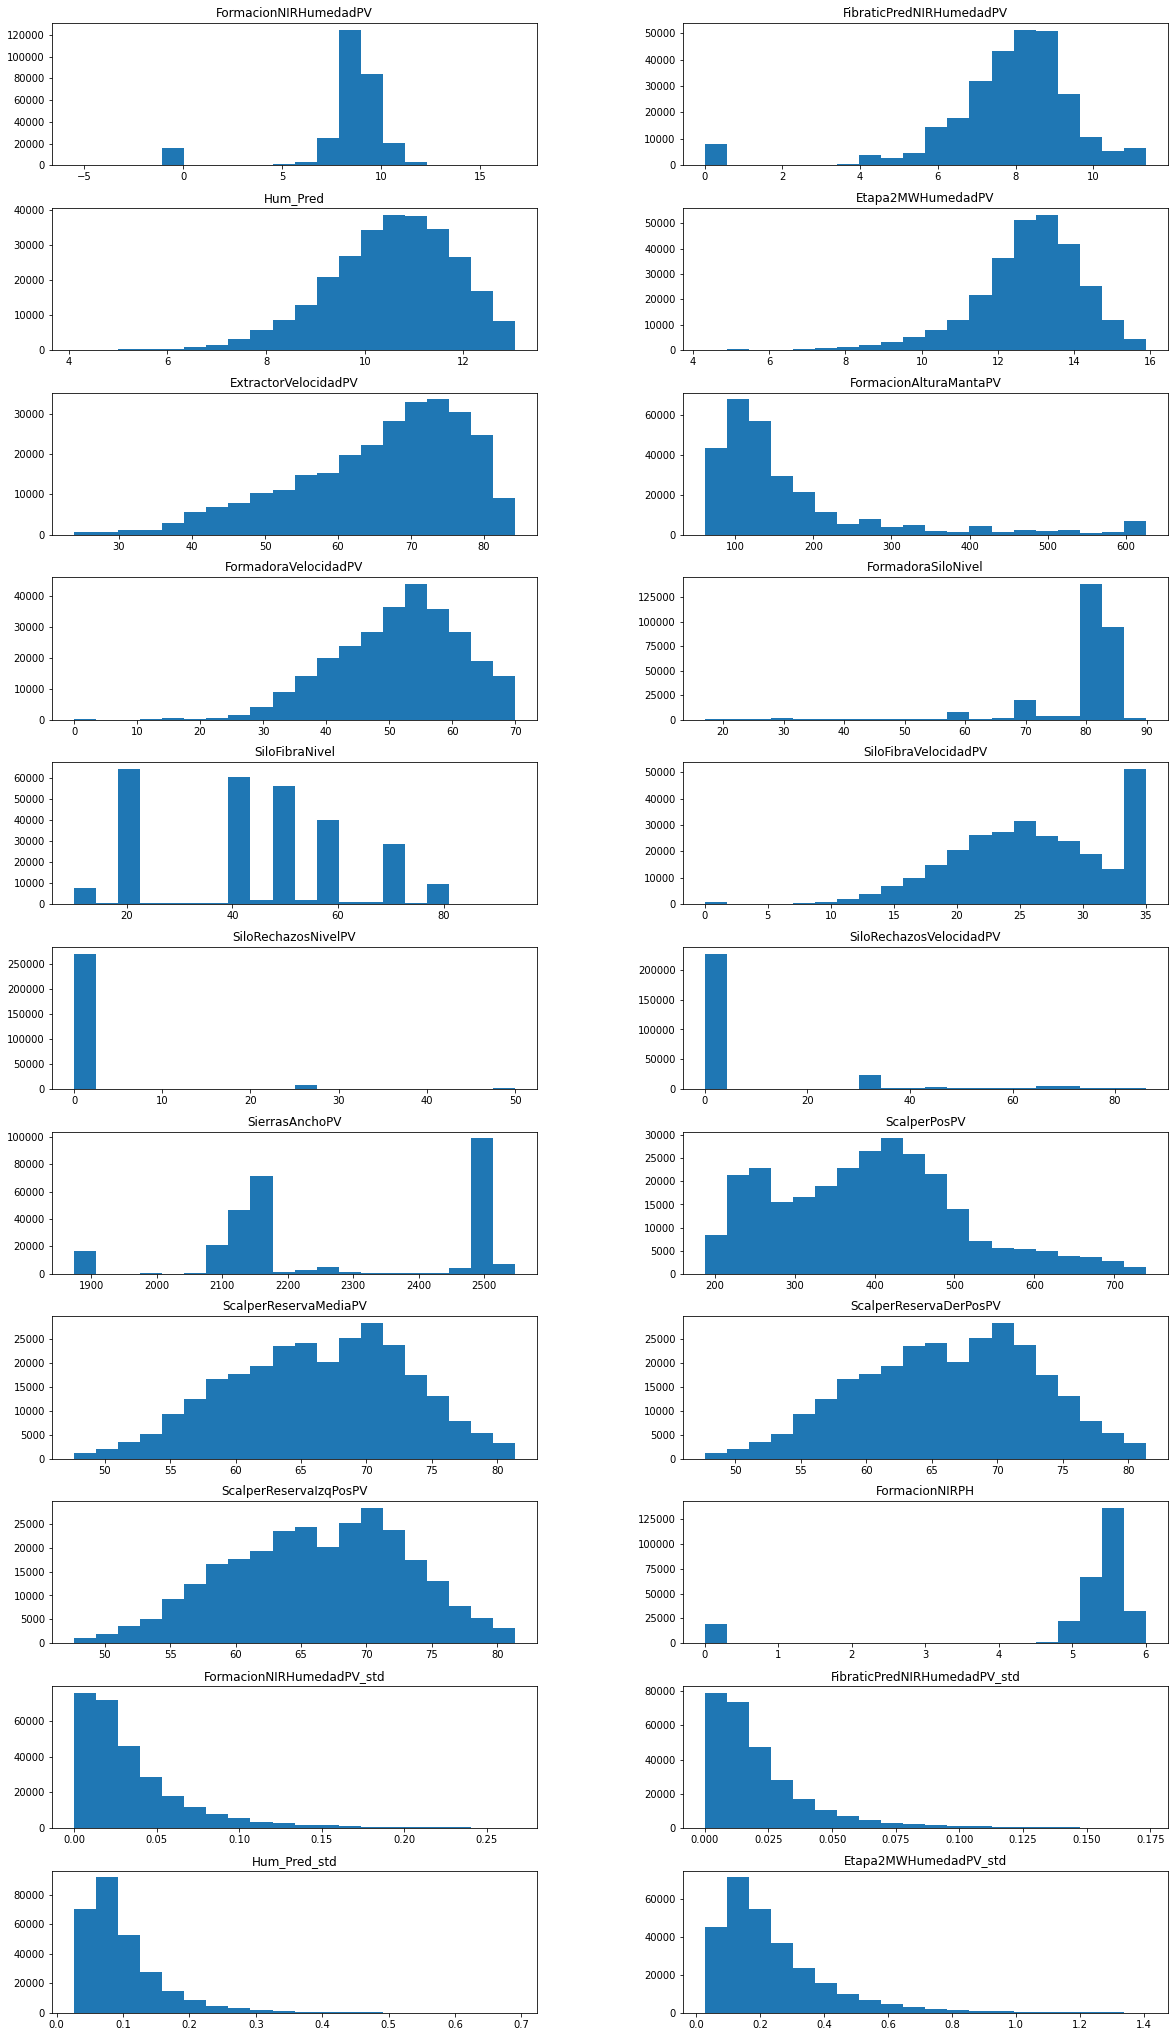

In [13]:
df.hist(bins=20,layout=(12,2),figsize=(20,40),grid=False)
plt.show()